In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import itertools
from matplotlib.ticker import ScalarFormatter
import mplfinance as mpf

In [15]:
df_raw = pd.read_csv('DailyDelhiClimateTrain.csv')
df_raw

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [4]:
print(df_raw.head(4).to_latex(index=False))

\begin{tabular}{lrrrr}
\toprule
date & meantemp & humidity & wind_speed & meanpressure \\
\midrule
2013-01-01 & 10.000000 & 84.500000 & 0.000000 & 1015.666667 \\
2013-01-02 & 7.400000 & 92.000000 & 2.980000 & 1017.800000 \\
2013-01-03 & 7.166667 & 87.000000 & 4.633333 & 1018.666667 \\
2013-01-04 & 8.666667 & 71.333333 & 1.233333 & 1017.166667 \\
\bottomrule
\end{tabular}



In [5]:
df = df_raw.copy()

summary_stats = {
    " ": [
        "Mean",
        "Min",
        "Q1",
        "Median",
        "Q3",
        "Max",
        "Mode",
        "Var",
        "SD",
        "CV",
        "IQR"
    ]
}

quantitative_cols = [
    'meantemp',
    'humidity',
    'wind_speed',
    'meanpressure'
]

def create_summary_df(df, quantitative_cols):
    for col in quantitative_cols:
        data = df[col]
        mean_val = data.mean()
        std_val = data.std()
        mode_val = data.mode().iloc[0] if not data.mode().empty else np.nan
        variance_val = data.var()
        cv_val = std_val / mean_val if mean_val != 0 else np.nan

        summary_stats[col] = [
            mean_val,
            data.min(),
            data.quantile(0.25),
            data.median(),
            data.quantile(0.75),
            data.max(),
            mode_val,
            variance_val,
            std_val,
            cv_val,
            data.quantile(0.75) - data.quantile(0.25)
        ]

    formatted_summary_df = pd.DataFrame(summary_stats).copy()

    for col in formatted_summary_df.columns[1:]:  # Skip "Thông số thống kê"
        formatted_summary_df[col] = formatted_summary_df[col].apply(lambda x: f'{x:,.4f}' if isinstance(x, (int, float)) else x)

    return formatted_summary_df

formatted_summary_df = create_summary_df(df, quantitative_cols)
formatted_summary_df = formatted_summary_df.applymap(lambda x: x.rstrip('0').rstrip('.') if isinstance(x, str) else x)
formatted_summary_df

C:\Users\PC\AppData\Local\Temp\ipykernel_26200\1769665565.py:57: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_summary_df = formatted_summary_df.applymap(lambda x: x.rstrip('0').rstrip('.') if isinstance(x, str) else x)


,,meantemp,humidity,wind_speed,meanpressure
0,Mean,25.4955,60.7717,6.8022,"1,011.1045"
1,Min,6,13.4286,0,-3.0417
2,Q1,18.8571,50.375,3.475,"1,001.5804"
3,Median,27.7143,62.625,6.2217,"1,008.5635"
4,Q3,31.3058,72.2188,9.2382,"1,014.9449"
5,Max,38.7143,100,42.22,"7,679.3333"
6,Mode,31,65.5,0,"1,016"
7,Var,53.9946,281.2212,20.8082,"32,483.4543"
8,SD,7.3481,16.7697,4.5616,180.2317
9,CV,0.2882,0.2759,0.6706,0.1783


In [6]:
print(formatted_summary_df.to_latex(index=False, escape=False, float_format="%.4f"))

\begin{tabular}{lllll}
\toprule
  & meantemp & humidity & wind_speed & meanpressure \\
\midrule
Mean & 25.4955 & 60.7717 & 6.8022 & 1,011.1045 \\
Min & 6 & 13.4286 & 0 & -3.0417 \\
Q1 & 18.8571 & 50.375 & 3.475 & 1,001.5804 \\
Median & 27.7143 & 62.625 & 6.2217 & 1,008.5635 \\
Q3 & 31.3058 & 72.2188 & 9.2382 & 1,014.9449 \\
Max & 38.7143 & 100 & 42.22 & 7,679.3333 \\
Mode & 31 & 65.5 & 0 & 1,016 \\
Var & 53.9946 & 281.2212 & 20.8082 & 32,483.4543 \\
SD & 7.3481 & 16.7697 & 4.5616 & 180.2317 \\
CV & 0.2882 & 0.2759 & 0.6706 & 0.1783 \\
IQR & 12.4487 & 21.8438 & 5.7632 & 13.3645 \\
\bottomrule
\end{tabular}



In [20]:
df_raw['date'] = pd.to_datetime(df['date'])
df_raw = df_raw.sort_values(by='date')

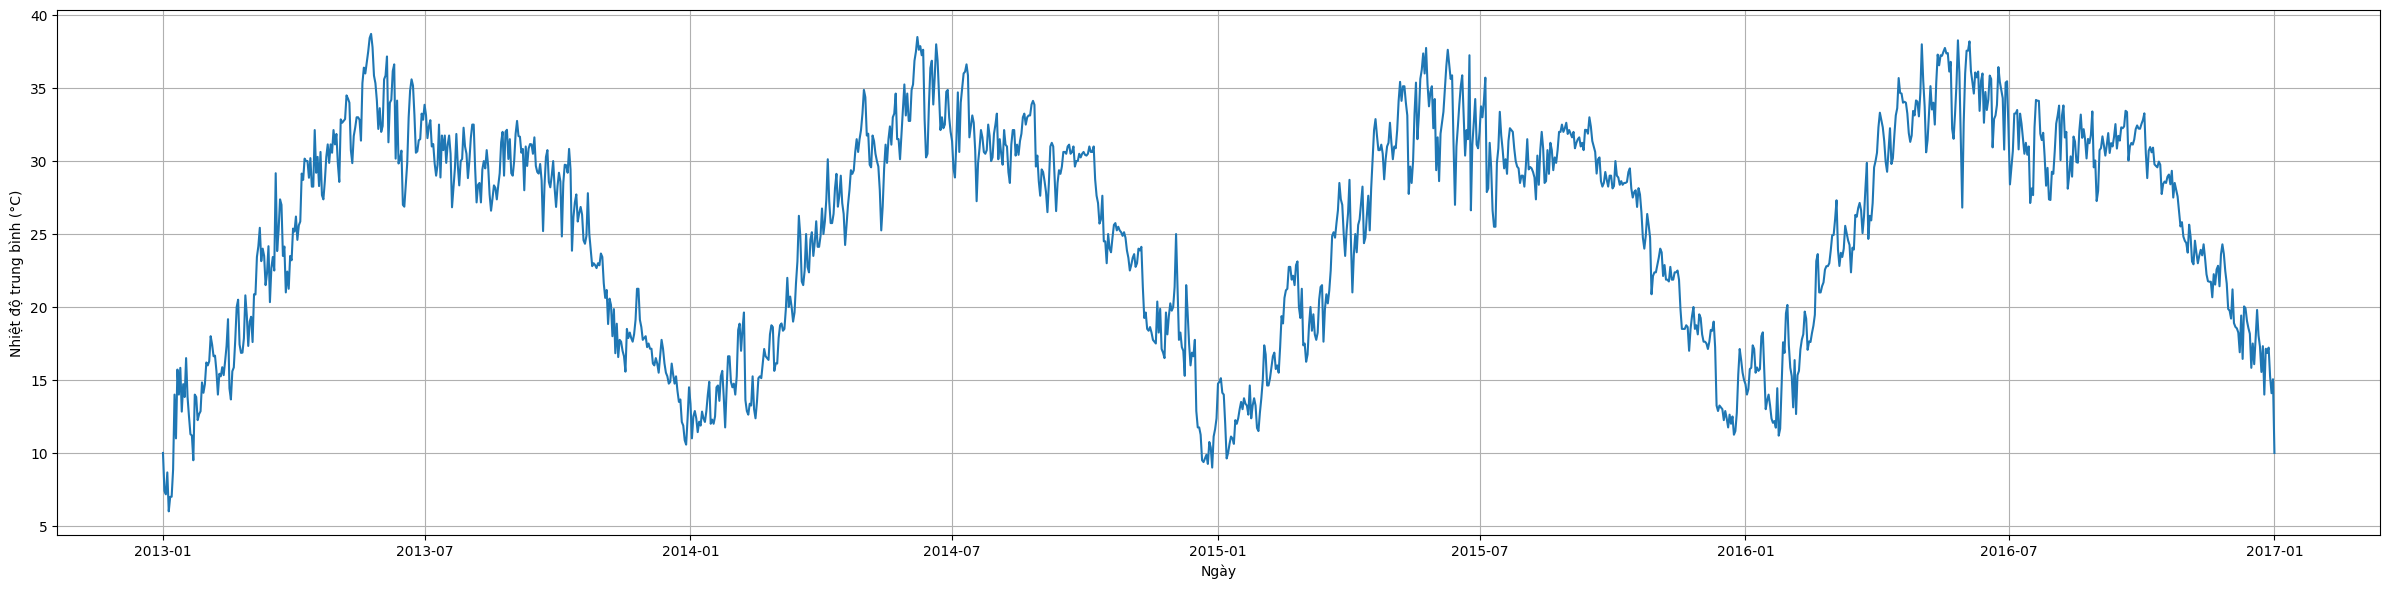

In [21]:
plt.figure(figsize=(24, 6))
plt.plot(df_raw['date'], df_raw['meantemp'], linestyle='-')
plt.xlabel('Ngày')
plt.ylabel('Nhiệt độ trung bình (°C)')
plt.grid(True)
plt.tight_layout()
plt.show()

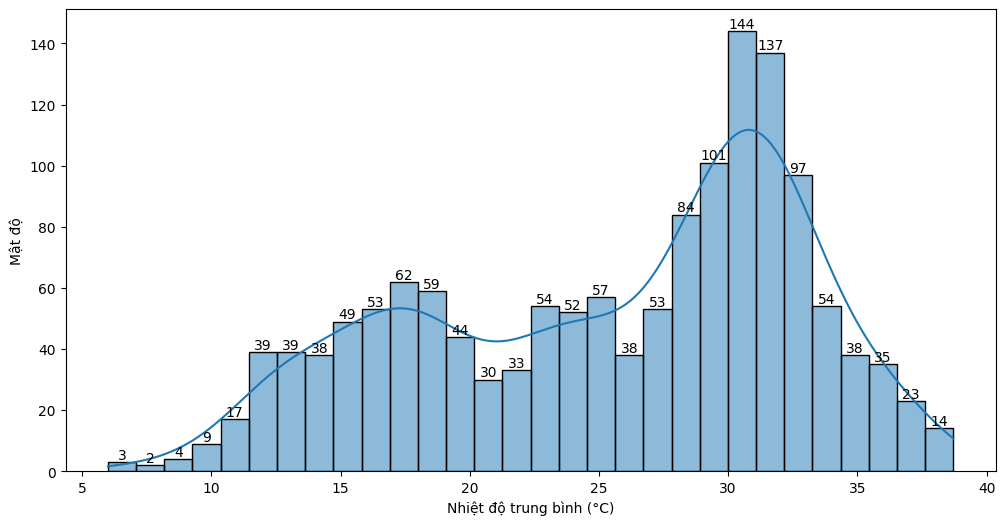

In [25]:
plt.figure(figsize=(12, 6))

sns.histplot(
    data=df_raw,
    x='meantemp',
    kde=True,
    stat='count',
    legend=False,
    bins=30
)

for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height(), 
             f'{p.get_height()}' if p.get_height() != 0 else '0',
             ha='center', va='bottom', fontsize=10, color='black')


plt.xlabel('Nhiệt độ trung bình (°C)')
plt.ylabel('Mật độ')
plt.show()

Text(0.5, 0, 'Nhiệt độ trung bình (°C)')

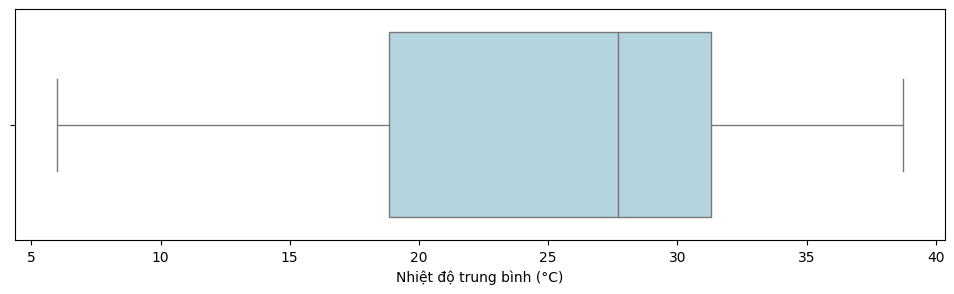

In [30]:
plt.figure(figsize=(12, 3))
sns.boxplot(
    data=df_raw,
    x='meantemp',
    color='lightblue'
)   
plt.xlabel('Nhiệt độ trung bình (°C)')


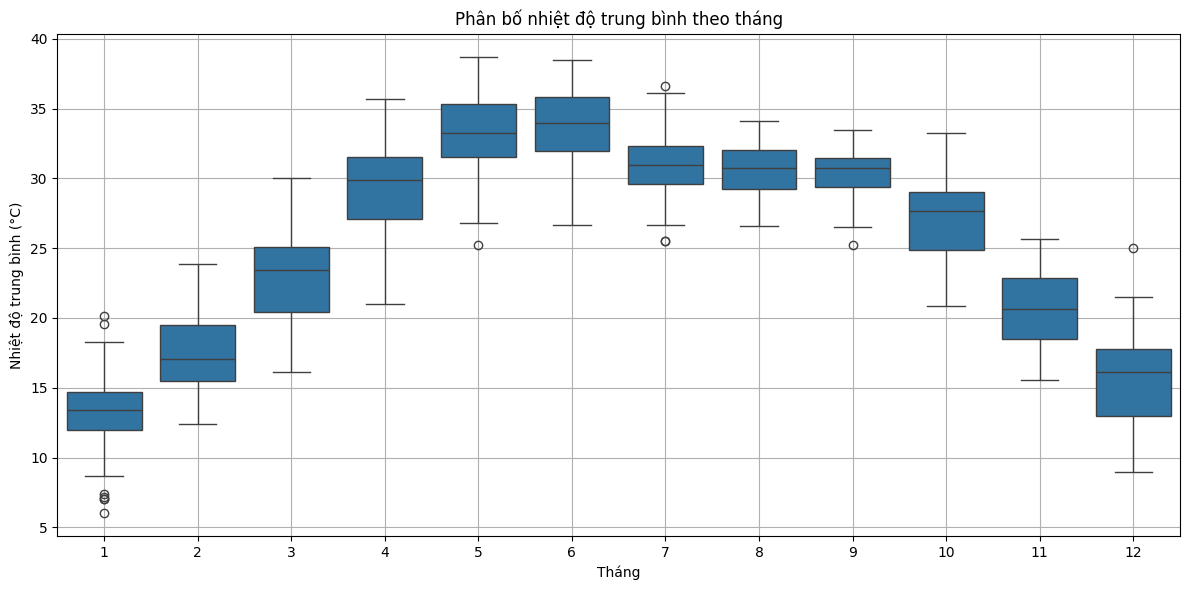

In [27]:

df['month'] = df['date'].dt.month

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='month', y='meantemp')

plt.xlabel('Tháng')
plt.ylabel('Nhiệt độ trung bình (°C)')
plt.title('Phân bố nhiệt độ trung bình theo tháng')
plt.grid(True)
plt.tight_layout()
plt.show()

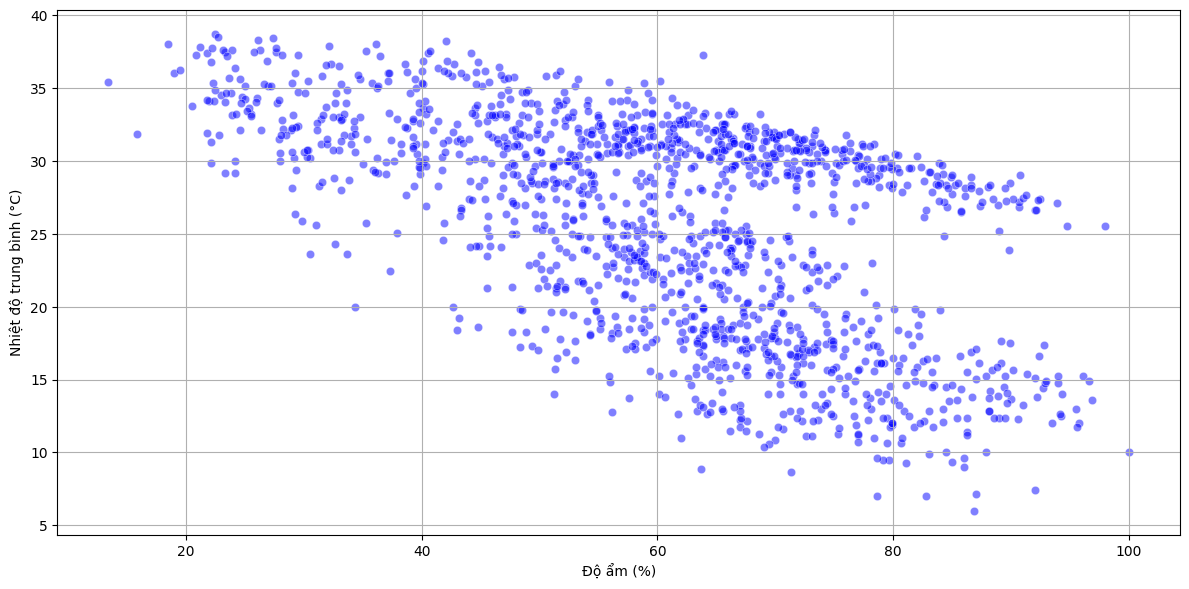

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_raw,
    x='humidity',
    y='meantemp',
    color='blue',
    alpha=0.5
)
plt.xlabel('Độ ẩm (%)')
plt.ylabel('Nhiệt độ trung bình (°C)')
plt.grid(True)
plt.tight_layout()
plt.show()